In [19]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [9]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [10]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [11]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [12]:
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

original_X = pd.DataFrame(original_X, columns=features)
train_X = pd.DataFrame(train_X, columns=features)
test_X = pd.DataFrame(test_X, columns=features)

In [23]:
model = LinearDiscriminantAnalysis()

In [24]:
# stratified (balanced), 5-fold
cross_val_score(model, original_X, original_y).mean()

0.7901198920343984

In [25]:
model = model.fit(train_X, train_y)

In [26]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.848314606741573
Test score
0.7755960729312763


In [27]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 88, TP: 63, FN: 16, FP: 11
Test
TN: 377, TP: 176, FN: 87, FP: 73


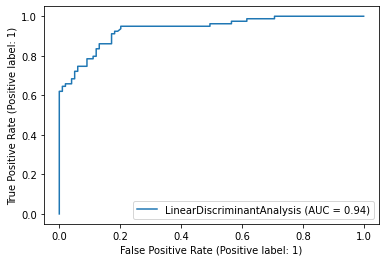

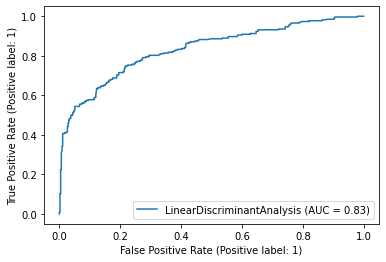

In [28]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)